In [1]:
from heapq import merge

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

#from rope.base.oi.soa import analyze_module
from scipy.stats import linregress
import libraries as lib

In [2]:
directory = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240701_20240707_monaco/20240705_endurance/0197 - 20240705T112922 4h42m28s 12.770km Monte-Carlo - Saint-Roman - Monte-Carlo"
file_accu = "8_Accu_09_04.csv"
file_master = "9_Master_08_05.csv"

In [3]:
data_file_accu = lib.DataInladen(f'{directory}/{file_accu}',debug=False)
data_file_master = lib.DataInladen(f'{directory}/{file_master}',debug=False)

In [4]:
#display(data_file_accu)
#display(data_file_master)

In [5]:
# Apply the function using the correct time columns
merged_df = lib.resample_and_merge(data_file_master, data_file_accu, freq='1s')
merged_df

,Datalogger port_df1,"Dataloggertijd, in s_df1",Cycle count,Snelheid over de grond in km/h,Richting van de snelheid,Datum_df1,Magnetische variatie,Data in balancers [Case H2a solution -> (000000000000),Snelheid tenopzichte van het water in Kilometers per uur,Board Temperature,...,MEAS,Format header (>09|04),Totale accu spanning,aantal oplaadpaden,aantal ontlaadpaden,Laatste hardware fout type met tijd en datum,Charge 0 stroom,Discharge 1 spanning,Discharge 1 stroom,"I’m, welke accu ben ik"
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:49,9.0,48.8740,53.944,0.0,100.0,50724.0,NaN,0.0,0.0,34.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:50,9.0,49.8906,54.960,0.0,100.0,50724.0,NaN,0.0,0.0,34.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:51,9.0,50.8597,55.929,0.0,100.0,50724.0,NaN,0.0,0.0,34.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:52,9.0,51.8641,56.934,0.0,100.0,50724.0,NaN,0.0,0.0,34.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:53,9.0,52.9212,57.991,0.0,100.0,50724.0,NaN,0.0,0.0,34.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 04:43:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,09|04,29.768,6,2,OT,-0.011,0.6,-0.030,C
0 days 04:43:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,09|04,29.766,6,2,OT,-0.011,0.6,-0.030,C
0 days 04:43:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,09|04,29.768,6,2,OT,-0.011,0.4,-0.030,C


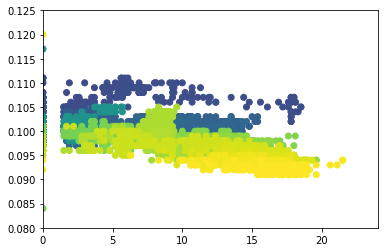

In [24]:
%matplotlib inline
xas = 'Snelheid over de grond in km/h'
yas = 'Discharge 1 stroom'
yas2 = 'Dataloggertijd, in s'
plt.scatter(merged_df[xas], merged_df[yas],c=merged_df.index, cmap='viridis')
plt.xlim(0, 24)
plt.ylim(0.08,0.125)
plt.show() #, trendline='linear', degree=1)

In [59]:
# Convert 'Latitude' and 'Longitude' to numeric, setting errors='coerce' to convert non-numeric values to NaN
merged_df['Latitude'] = pd.to_numeric(merged_df['Latitude'], errors='coerce')
merged_df['Longitude'] = pd.to_numeric(merged_df['Longitude'], errors='coerce')
merged_df['Snelheid over de grond in km/h'] = pd.to_numeric(merged_df['Snelheid over de grond in km/h'], errors='coerce')
merged_df['Discharge 1 stroom'] = pd.to_numeric(merged_df['Discharge 1 stroom'], errors='coerce')
merged_df['Discharge 1 spanning'] = pd.to_numeric(merged_df['Discharge 1 spanning'], errors='coerce')

# Filter out rows where 'Latitude' or 'Longitude' is NaN
merged_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

# Filter rows where 'Latitude' is between 4300 and 4400 and 'Longitude' is between 700 and 800
filtered_df = merged_df[(merged_df['Latitude'] >= 4300) &
                        (merged_df['Latitude'] <= 4400) &
                        (merged_df['Longitude'] >= 700) &
                        (merged_df['Longitude'] <= 800) &
                        (merged_df['Snelheid over de grond in km/h'] >= 0) &
                        (merged_df['Snelheid over de grond in km/h'] <= 50)]
filtered_df

,Datalogger port_df1,Cycle count,Snelheid over de grond in km/h,Richting van de snelheid,Datum_df1,Magnetische variatie,Data in balancers [Case H2a solution -> (000000000000),Snelheid tenopzichte van het water in Kilometers per uur,Board Temperature,Format header (>08|05),...,MEAS,Format header (>09|04),Totale accu spanning,aantal oplaadpaden,aantal ontlaadpaden,Laatste hardware fout type met tijd en datum,Charge 0 stroom,Discharge 1 spanning,Discharge 1 stroom,"I’m, welke accu ben ik"
"Dataloggertijd, in s",,,,,,,,,,,,,,,,,,,,,
0 days 00:00:49,9.0,53.944,0.0,100.0,50724.0,NaN,0.0,0.00,34.5,08|05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:50,9.0,54.960,0.0,100.0,50724.0,NaN,0.0,0.00,34.4,08|05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:51,9.0,55.929,0.0,100.0,50724.0,NaN,0.0,0.00,34.4,08|05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:52,9.0,56.934,0.0,100.0,50724.0,NaN,0.0,0.00,34.4,08|05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:00:53,9.0,57.991,0.0,100.0,50724.0,NaN,0.0,0.00,34.4,08|05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 04:43:12,9.0,64.356,15.7,227.1,50724.0,NaN,0.0,14.43,43.2,08|05,...,NaN,09|04,29.448,6,2,OT,5.211,29.5,0.093,C
0 days 04:43:13,9.0,65.323,14.8,235.6,50724.0,NaN,0.0,14.09,43.2,08|05,...,NaN,09|04,29.430,6,2,OT,5.211,29.5,0.093,C
0 days 04:43:14,9.0,66.335,15.0,237.9,50724.0,NaN,0.0,13.95,43.2,08|05,...,NaN,09|04,29.448,6,2,OT,5.324,29.5,0.092,C


In [69]:
%matplotlib qt
plt.plot(filtered_df.index,filtered_df['Snelheid over de grond in km/h'], 'o')

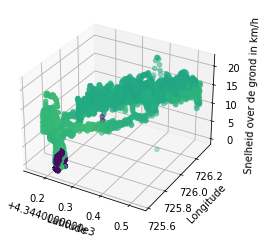

In [66]:
%matplotlib inline
#plt.scatter(filtered_df['Latitude'], filtered_df['Longitude'],c=filtered_df.index, cmap='viridis')

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(filtered_df['Latitude'], filtered_df['Longitude'], filtered_df['Snelheid over de grond in km/h'], c=filtered_df['Discharge 1 stroom']*filtered_df['Discharge 1 spanning'], cmap='viridis')

# Set axis labels
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Snelheid over de grond in km/h')

# Show the plot
plt.show()

In [7]:
xas = 'Snelheid over de grond in km/h'
yas = 'Discharge 1 stroom'
#zas = ''
# I only want the rows where discharge 1 stroom has a numerical value
#merged_df['Discharge 1 stroom'] = merged_df['Discharge 1 stroom'].astype(float)
#remove data that's 0
#data_file_filtered = merged_df[merged_df['Discharge 1 stroom'] != 0]
#data_file_filtered = merged_df[merged_df['Snelheid over de grond in km/h'] != 0]
#data_file_filtered = merged_df[[xas, yas]].dropna()

# Now filter out the beginning and end of the data, by removing the first and last 10% of the data
from math import ceil
#data_file
#data_file = data_file.iloc[ceil(len(data_file)*0.215):ceil(len(data_file)*0.267)]

# Display the filtered data
#data_file_filtered

In [46]:
plotten = lib.plot_data(merged_df, xas, yas)#, trendline='linear', degree=1)